In [5]:
import agent
import env
import numpy as np
import matplotlib.pyplot as plt
from tools import generate_bandits, generate_agents, run_experiment

In [6]:
nb_arms = 2
means = [1,0]
trajectory_length = 1000000

In [7]:
ag = agent.UCBBandit(nb_arms)
bandit = env.GaussianBandit(nb_arms, means)

In [8]:
sum_draws = [0]

for iter in range(trajectory_length):
    arm = ag.best_action()
    reward = bandit.play(arm)
    ag.observe(arm, reward)
    sum_draws.append(sum_draws[-1] + arm)


In [9]:
print(ag.estimations)
print(2/((ag.estimations[0] - ag.estimations[1])**2))

[1.000657112315883, 0.12191062688449604]
2.5900180668597623


Text(0.5, 1.0, 'Cumulative number of draws of suboptimal arm, over time')

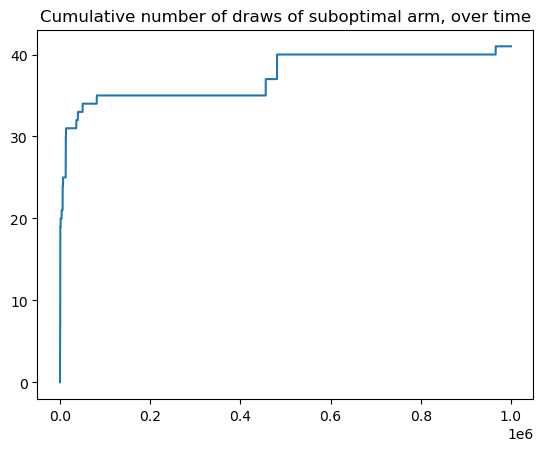

In [10]:
plt.plot(sum_draws)
plt.title("Cumulative number of draws of suboptimal arm, over time")

C:\Users\Alex\AppData\Local\Temp\ipykernel_4344\3887299341.py:1: RuntimeWarning: invalid value encountered in scalar divide
  renormalized = [sum_draws[i]/np.log(i+1) for i in range(iter)]


Text(0.5, 1.0, 'Ratio of the cumulative number of draws of suboptimal arm divided by log of time, over time')

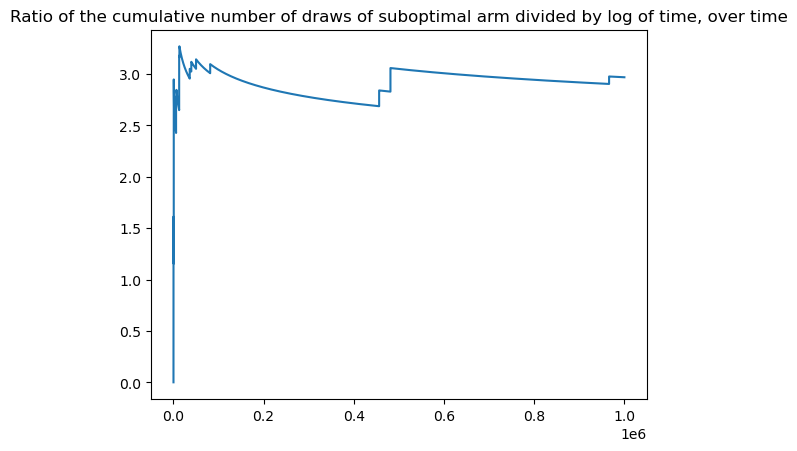

In [11]:
renormalized = [sum_draws[i]/np.log(i+1) for i in range(iter)]
plt.plot(renormalized)
plt.title("Ratio of the cumulative number of draws of suboptimal arm divided by log of time, over time")

# Experiences

In [12]:
nb_arms = 2
means = [1,0]
traj_length = 1000000
stds = [1, 1]
ucb_version = "ucb2"

In [13]:
Trajs = []
nb_traj = 15

for i in range(nb_traj):
    ag = agent.UCBBandit(nb_arms, ucb_version=ucb_version)
    bandit = env.GaussianBandit(nb_arms, means, stds, seed=None)
    sum_draws = [0]
    print(f"Iteration {i+1}", end="\r")

    for iter in range(traj_length):
        arm = ag.best_action()
        reward = bandit.play(arm)
        ag.observe(arm, reward)
        sum_draws.append(sum_draws[-1] + arm)

    Trajs.append(sum_draws)

    

In [14]:
Traj_loged = []
for traj in Trajs:
    Traj_loged.append([traj[i]/np.log(i+2) for i in range(len(traj))])

Text(0.5, 1.0, 'Cumulative number of draws of suboptimal arm, over time')

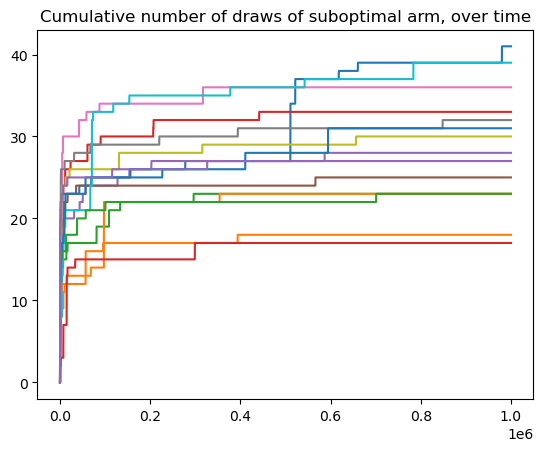

In [15]:
for traj in Trajs:
    plt.plot(traj)
plt.title("Cumulative number of draws of suboptimal arm, over time")

Text(0.5, 1.0, 'Ratio of the cumulative number of draws of suboptimal arm divided by log of time, over time (log scale)')

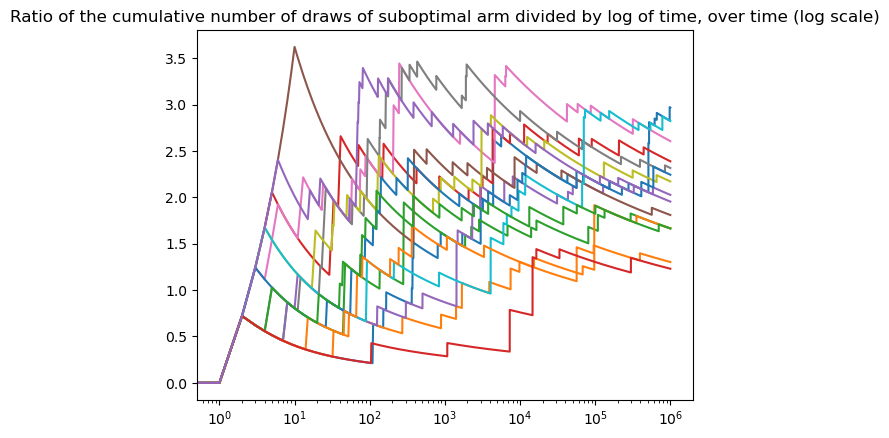

In [16]:
for trajl in Traj_loged:
    plt.plot(trajl)
plt.xscale("log")
plt.title("Ratio of the cumulative number of draws of suboptimal arm divided by log of time, over time (log scale)")

### Compute average

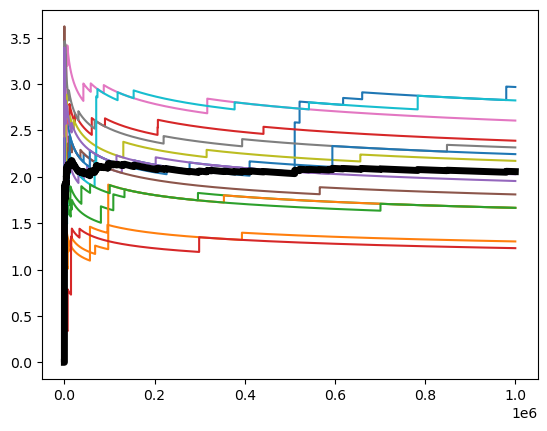

In [17]:
avg = []
for i in range(traj_length):
    avg_draws = np.mean([trajl[i] for trajl in Traj_loged])
    avg.append(avg_draws)

for trajl in Traj_loged:
    plt.plot(trajl)
plt.plot(avg, color="black", linewidth=5)

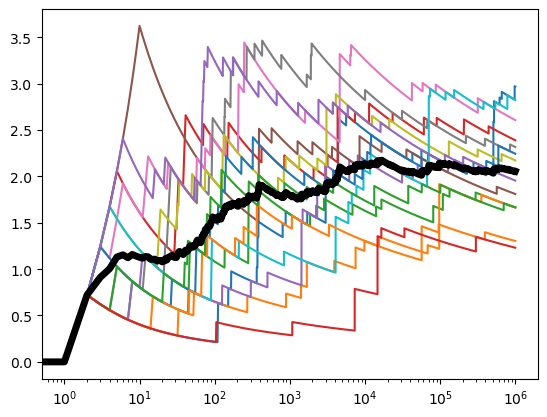

In [18]:
for trajl in Traj_loged:
    plt.plot(trajl)
plt.plot(avg, color="black", linewidth=5)
plt.xscale("log")

# Experience 3 arms

In [19]:
import agent
import env
from tools import generate_agents, generate_bandits, run_experiment, get_arm_proportion, get_arm_proportions_time
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Arm settings
nb_arms = 3
means = [1,0.5,0]
stds = [1,1,1]

bandit_version = "gaussian"
agent_version = "ucb"
ucb_version = "ucb2"

In [21]:
#Experience settings
nb_traj = 5000 #This might take a long time depending on the computer (20min for mine)
length_traj = int(1e4)
seeds = None

In [23]:
bandits = generate_bandits(nb_traj, bandit_version, nb_arms, means, stds, seeds)
agents = generate_agents(nb_traj, agent_version, nb_arms, ucb_version)
run_experiment(bandits, agents, nb_traj, length_traj)
#I can remove the history

In [26]:
draws_proportions_end = get_arm_proportion(agents, True)
average = np.mean(draws_proportions_end, axis=0)

for i in range(3):
    print(f"\nExperience {i+1}:")
    for arm in range(nb_arms):
        print(f"\tArm {arm+1}: {draws_proportions_end[i][arm]}")
    print(f"\tRatio :{draws_proportions_end[i][1]/draws_proportions_end[i][2]}")

print("\nMeans")
for arm in range(nb_arms):
    print(f"\tArm {arm+1}: {average[arm]}")




Experience 1:
	Arm 1: 1077.376035981492
	Arm 2: 6.62299084902459
	Arm 3: 1.737177927613007
	Ratio :3.8125000000000004

Experience 2:
	Arm 1: 1077.376035981492
	Arm 2: 6.731564469500403
	Arm 3: 1.6286043071371943
	Ratio :4.133333333333333

Experience 3:
	Arm 1: 1073.3588120238867
	Arm 2: 10.31449394520223
	Arm 3: 2.062898789040446
	Ratio :5.0

Means
	Arm 1: 1076.399676841997
	Arm 2: 7.286527673200473
	Arm 3: 2.0500002429279207


Text(0.5, 0.98, 'Histogram of the number of draws of each arm, over many experiences')

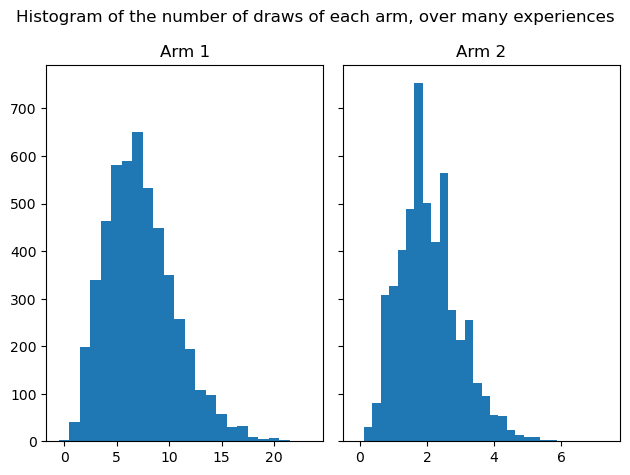

In [31]:
arm1 = [draws_proportions_end[i][1] for i in range(nb_traj)]
arm2 = [draws_proportions_end[i][2] for i in range(nb_traj)]
bins1 = [-0.5 + i for i in range(int(max(arm1) +1))]
bins2 = [-0.125 + 0.25*i for i in range(int(4*max(arm2) +1))]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(arm1, bins=bins1)
axs[0].set_title("Arm 1")
axs[1].hist(arm2, bins=bins2)
axs[1].set_title("Arm 2")
fig.suptitle("Histogram of the number of draws of each arm, over many experiences")